# 练习1

<style>
.CodeMirror pre {
    white-space: pre-wrap;
}
</style>

## 1. Setup

In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Classifying iris flowers
The <b><i>iris</i></b> dataset is a classical dataset in machine learning. It contains 150 examples of iris flowers from three diferent types: setosa, versicolor and virginica (50 from each type); each example is described with 4 numerical features: sepal length, sepal width, petal length and petal width. 


### The iris data
It is included in the <b>dataset</b> module of <b>scikit-learn</b> and can be loaded by calling the <b>load_iris</b> function: 

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The iris object that is returned is similar to a dictionary and contains keys and values. The value of the key <b> DESCR</b> is a short description of the dataset, the value of <b>target-names</b> is an array of strings containing the names of the three types of flowers and the value of <b>feature_names</b> contains the names of each feature:


In [4]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [6]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [7]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the <b>data</b> and <b>target</b> fields, both of which are <b>NumPy</b> arrays.

The array <b>data</b> contains the values of the 4 features; the rows correspond to the flowers and the columns to the features - 150 exampls and 4 features. 

In [8]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [9]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


Let's print the feature values for the first 5 examples to get a better understanding of the data:

In [10]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


The <b>target</b> array contains the type of flower.  It is a 1-dimensional array, with 1 entry per example, where the type of flower is represented as an integer: 0 for setosa, 1 for versicolor and 2 for virginica:

In [11]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [12]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [13]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Measuring success: training and test sets
Our goal is to build a classifier that can predict the class of new (unseen) examples, i.e. not simply to remember the given data but to <i>generalise</i> well on new data. As we saw during the lecture, to evaluate how good our classifier is, we can split the given data into two subsets: <i>training</i> and <i>test</i>. The first one is used to build the classifier and the second one is used to evaluate its performance, e.g. by calculating the <i>accuracy</i> - the percentage of correctly classified examples.

Note that there are better evaluation strategies than a single training/test split, e.g. cross validation. We will study them later in the course. 

To split the data into training and test set, we will use the <b>train_test_split</b> function from scikit-learn. By default it splits the data into 75% for training and 25% for testing (this % can be changed). Before making the split, it shuffles that dataset using a pseudorandom number generator. This is important for the iris dataset as the examples are sorted based on their class label as we saw before. We don't want the test set to contain only examples from the third class - we would like both the training and test set to contain examples from all three classes for better generalisation, that's why we shuffle the data.

The split function includes random element due to the shuffling. To make sure that we will get the same split every time we use it, we use a pseudorandom generator with a fixed seed.

The output of the train_test_split function is X_train, X_test, y_train and y_test, all of which are NumPy arrays. The convention is to use capital letter for more than 1-dimensional arrays and lower letter for 1-dimensional arrays, that's wht we use capital X and small y. We can check that X-train contains 75% of the data and X-test contains the remaining 25%:


In [14]:
# 默认训练集占据75%的数据, 测试集占据25%的数据, random_state指定的是随机种子
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [16]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


### Inspecting the data
Before building a machine learning model, it is a good idea to inspect the data. This will show if the desired information is included, if there are inconsistencies and abnormalities, and may also give an indication if the task is easily solvable.

We can inspect the data by visualizing it, e.g. by using a <i>scatter plot</i> (one feature versus another). As our data is 4-dimensional we do a <i>pair plot</i> - visualizing all possible pairs of features. To do this we can use the scatter_matrix function from <b>pandas</b>, after convering the <b>X_train</b> array into a <b>DataFrame</b>. The diagonal of the pair plot matrix contains the histograms of each feature.

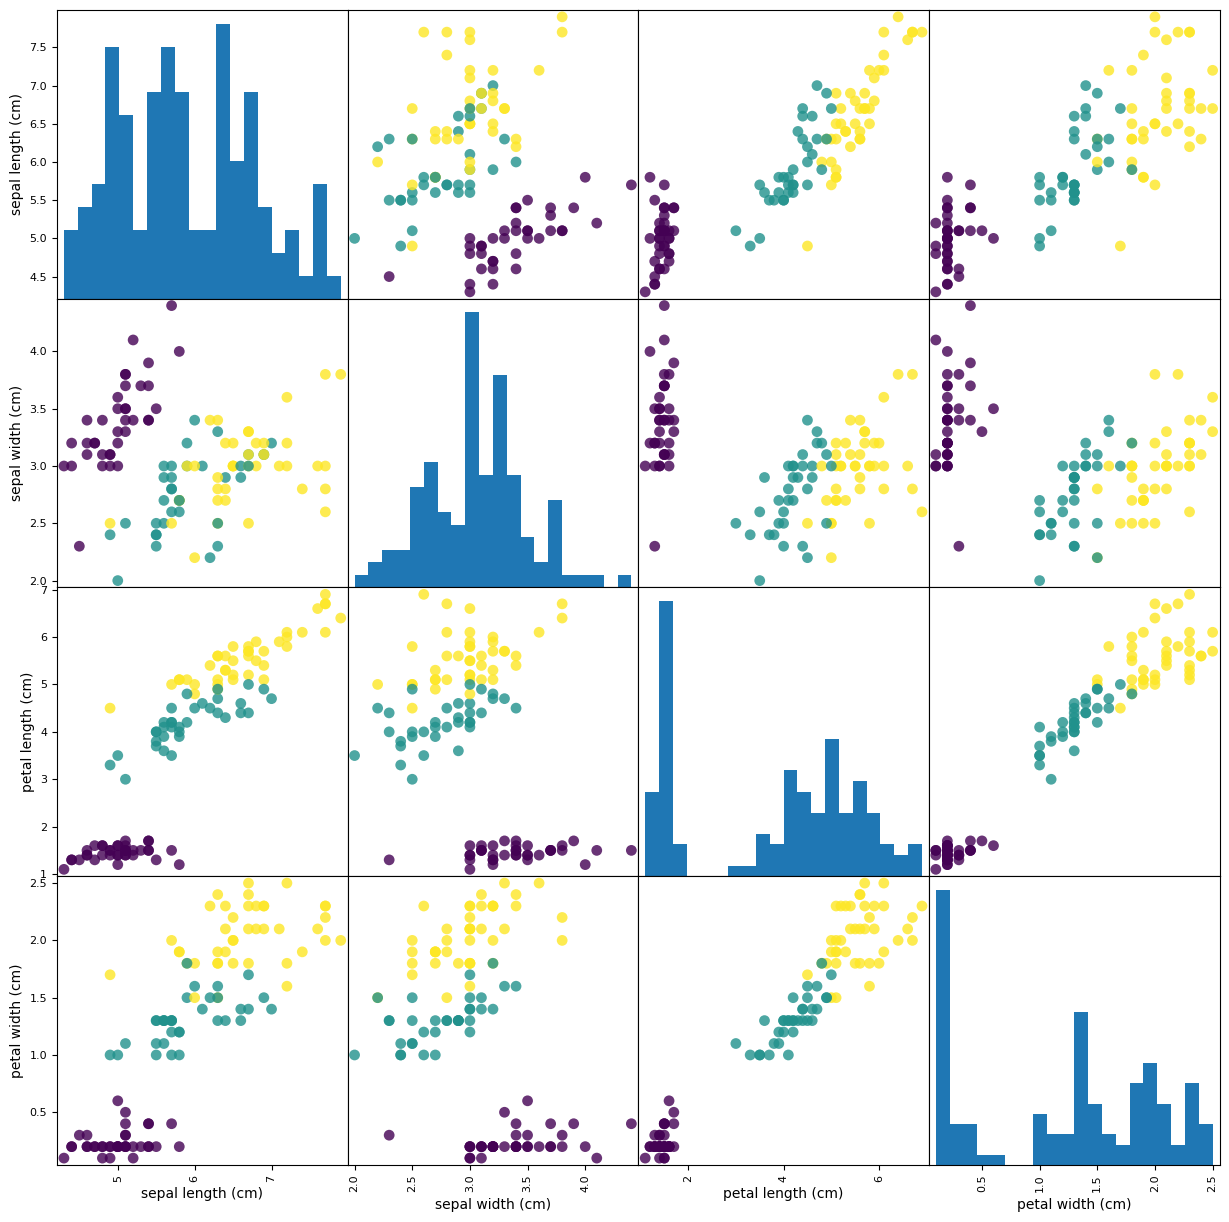

In [21]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                         alpha=.8);

# 对角线上的单变量分布图: 横轴表示所研究变量的取值范围. 纵轴表示在每个区间内的概率密度. 
# 非对角线上的散点图: 表示了每对特征之间的两两关系.

In [22]:
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


Although we can't see the interaction of all 4 features at once, the pair plots reveal interesting aspects of the data. We can see that one of the iris types is well separted from the other types on all subplots, while the other two show some overlap.

## 3. Building a k-nearest neighbor classifier
As we saw during the lecture, the k-nearest neighbor algorithm is simple and easy to understand. The training consists of simply storing the dataset; to make a prediction for a new example, the 1-nearest neighbor algorithm finds the example in the training set that is closest to the new example using a distance measure, and then assigns the new example to the class of the closest training example.

It is possible to use more than 1 neighbor, in this case the class of the new example is determine by taking the majority class of the neighbours.

In <b>scikit-learn</b> the k-nearest neighbor algorithm is implemented in the <b>KNeighborsClassifier</b> class, which is part of the <b>neighbours</b> module. We firstly need to create an object of this class and then set its parameters. The most important parameter is the number of neighbours. We create an object caled <b>knn</b> and set the number of neighbours to 1:

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# 这边的n_neighbors表示k的值是1.

We build the classifier by calling the <b>fit</b> method with the training data as parameters (the feature vectors <b>X_train</b> and target classses <b>y_train</b>):

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

The <b>fit</b> method returns the <b>knn</b> object and we can see which parameters were used to create the classifier. These are the default parameters except the number of neighbours which we set to 1 (default=5). Note that the default distance is Minkowsi with p=2, which is equivalent to the Eucledian distance; with p=1, it is equivalent to the Manhattan distance.

### Evaluating the k-nearest neighbour classifier on test data
We can do this by caling the <b>predict</b> method of the <b>knn</b> object:

In [25]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


These are the predictions for the 38 examples from the test set.

Now we can calculate the accuracy on the test set. Below we show two ways to do this - using the methods <b>score</b> and <b>accuracy_score</b>. Both methods calculate the accuracy on the dataset that is passed as parameters but please note the different parameters they take:

In [26]:
print("Accuracy on test set: {:.2f}".format(knn.score(X_test, y_test)))

Accuracy on test set: 0.97


In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy on test set: 0.97


Thus, our nearest neighbor model classified correctly 97% of the examples in the test set.

### Making prediction for a new example, without class label

Suppose that we have found an iris flower with the following measurements: sepal length=5cm, sepal width=2.9cm, petal length=1cm, petal width=0.2cm. We would like to use our nearest neighbor clasifier to predict its type.

To do this, we have to put this example into a NumPy array - 1 row with 4 columns:

In [28]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


Now we can make the prediction by using the <b>predict</b> method as before. The prediction is setosa but we don't know if it is correct as we don't have the correct label.

In [31]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


### Tasks for you: 

Task 1: Build a nearest neighbor classifier with more then 1 neighbours, e.g. with 7. Try other values too. Use the same training/test split as before. Evaluate the accuracy on the test set and compare with 1-nearest neighbor. Is there a guarantee that the accuracy will improve if we use more neighbours? 

Task 2: Evaluate the accuracy of 1-nearest neighbor on the training set, i.e. train on the training set and test on the same set. Is this as expected? How can you explain it?

Task 3: Now evaluate the accuracy of 3-nearest neighbor on the training set. What happens when <b>n_neighbors</b> is not 1?

In [35]:
# Task1: 尝试将k增加到7
from sklearn.neighbors import KNeighborsClassifier
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred = knn_7.predict(X_test)
print("Test set predictions with k set to 7:\n", y_pred)
print("Accuracy on test set: {:.2f}".format(knn_7.score(X_test, y_test)))
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)
prediction = knn_7.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Test set predictions with k set to 7:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Accuracy on test set: 0.97
X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']


In [38]:
# Task2: 评估将训练集作为测试集喂给1-最邻近模型
y_pred = knn.predict(X_train)
print("Test set predictions:\n", y_pred)
print("Accuracy on test set: {:.2f}".format(knn.score(X_train, y_train)))

Test set predictions:
 [1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]
Accuracy on test set: 1.00


可以看到, 如果把训练集给1-最邻近模型做测试的话, 是百分之百通过的.

In [39]:
# Task3: 在Task2的基础上将k赋值为3
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred = knn_3.predict(X_train)
print("Test set predictions with k set to 3:\n", y_pred)
print("Accuracy on test set: {:.2f}".format(knn_3.score(X_train, y_train)))
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)
prediction = knn_3.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Test set predictions with k set to 3:
 [1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 2 1 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2
 0]
Accuracy on test set: 0.96
X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']


可以看到, 如果把训练集给3-最邻近模型做测试的话, 不一定是百分之百通过的.

## 4. Normalisation

Did we forget something? We didn't normalise the data. This is important for the k-Nearest Neighbor algorithm. We can do this using the MinMax scaler which transforms the data:

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()#creating an object
scaler.fit(X_train)#calculate min and max value of the training data

X_train_norm = scaler.transform(X_train) #apply normalisation to the training set

#Apply normalization to the test set
#Important: MinMaxSDcaler (and the other scalers)always apply the same transformation 
#to the training and test set, based on the min and max values of the training set:
X_test_norm = scaler.transform(X_test) 

print(X_train_norm)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm) 
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_pred, y_test)))

[[0.44444444 0.41666667 0.53448276 0.58333333]
 [0.41666667 0.25       0.5        0.45833333]
 [0.69444444 0.41666667 0.75862069 0.83333333]
 [0.11111111 0.5        0.03448276 0.04166667]
 [0.72222222 0.45833333 0.68965517 0.91666667]
 [0.19444444 0.625      0.0862069  0.20833333]
 [0.30555556 0.70833333 0.06896552 0.04166667]
 [0.19444444 0.         0.4137931  0.375     ]
 [0.61111111 0.41666667 0.75862069 0.70833333]
 [0.66666667 0.54166667 0.79310345 1.        ]
 [0.47222222 0.08333333 0.67241379 0.58333333]
 [0.66666667 0.20833333 0.81034483 0.70833333]
 [0.36111111 0.20833333 0.48275862 0.41666667]
 [0.94444444 0.41666667 0.86206897 0.91666667]
 [0.55555556 0.54166667 0.62068966 0.625     ]
 [0.33333333 0.16666667 0.46551724 0.41666667]
 [0.55555556 0.29166667 0.65517241 0.70833333]
 [0.55555556 0.33333333 0.68965517 0.58333333]
 [0.16666667 0.20833333 0.5862069  0.66666667]
 [0.55555556 0.20833333 0.67241379 0.75      ]
 [0.75       0.5        0.62068966 0.54166667]
 [0.61111111 

## Summary

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy on test set: 0.97


## Acknowledgements
This tutorial is based on:

Andreas C. Mueller and Sarah Guido (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists, O'Reilly.